In [1]:
import os
import glob
import random
from mpl_toolkits.axes_grid1 import ImageGrid

import tqdm
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

## H&M

In [2]:
files = glob.glob("../H&M/images/*/*")
file_paths = dict((os.path.splitext(os.path.split(f)[-1])[0], f) for f in files)

df = pd.read_csv('../H&M/articles.csv', 
                 usecols=['article_id', 'product_code'],
                 dtype={'article_id': str, 'product_code': str})

groupped_products = {}
for index, row in df.iterrows():
    v = groupped_products.get(row['product_code'], [])
    f = file_paths.get(row['article_id'])
    if f:
        groupped_products[row['product_code']] = v + [f]

groupped = {}
counter = 0
for key, value in groupped_products.items():
    if len(value) >= 4:
        groupped[counter] = value
        counter += 1
        
counter, sum(len(v) for _, v in groupped.items())

(6254, 42541)

<BarContainer object of 6254 artists>

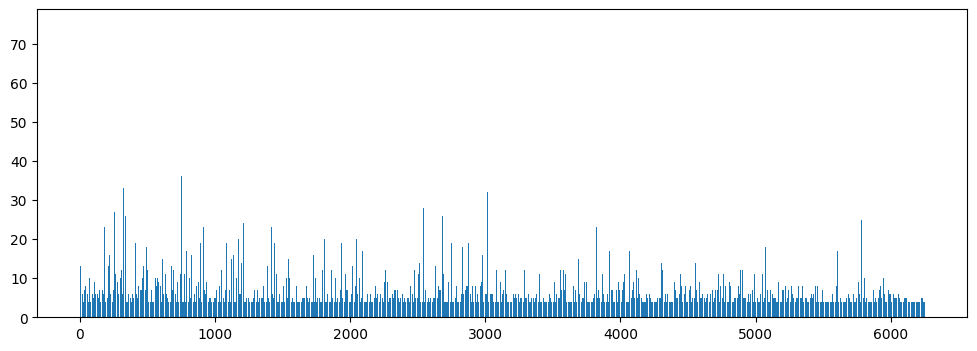

In [3]:
groups, counts = [], []
for k, v in groupped.items():
    groups.append(k)
    counts.append(len(v))
plt.figure(figsize=(12, 4))
plt.bar(groups, counts)

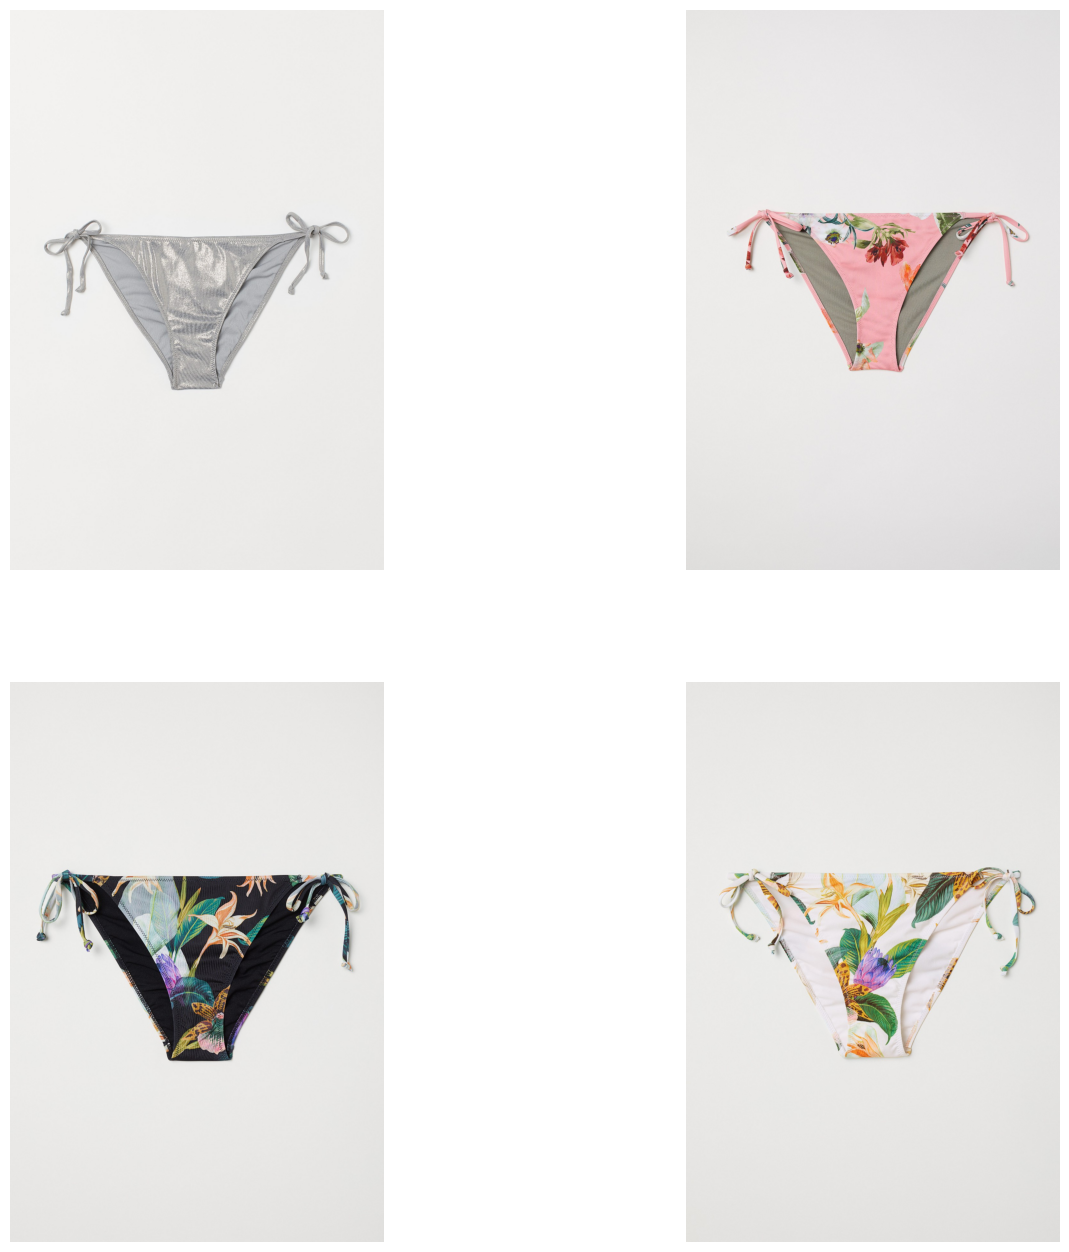

In [4]:
i = 1000

paths_i = groupped[i]
random.shuffle(paths_i)


nrows = 2
ncols = 2

fig = plt.figure(figsize=(16, 16))

for r in range(nrows):
    for c in range(ncols):
        i = r + c*ncols
        path = paths_i[i]
        
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(nrows, ncols, i+1)
        plt.imshow(img)
        plt.axis('off')

## Shopee

In [5]:
df = pd.read_csv('../shopee/train.csv')
df = df.drop_duplicates(subset='image_phash', keep="last")
df_g = df.groupby('label_group', group_keys=True).apply(lambda x: x)

groupped = {}

counter = 0
for group in tqdm.tqdm(set(df_g['label_group'])):
    names = list(df_g.image[df_g['label_group'] == group])
    if len(names) >= 4:
        paths = [os.path.join('../shopee/train_images', name) for name in names]
        groupped[counter] = paths
        counter += 1
        
counter, sum(len(v) for _, v in groupped.items())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 11008/11008 [00:01<00:00, 9003.54it/s]


(1497, 9176)

<BarContainer object of 1497 artists>

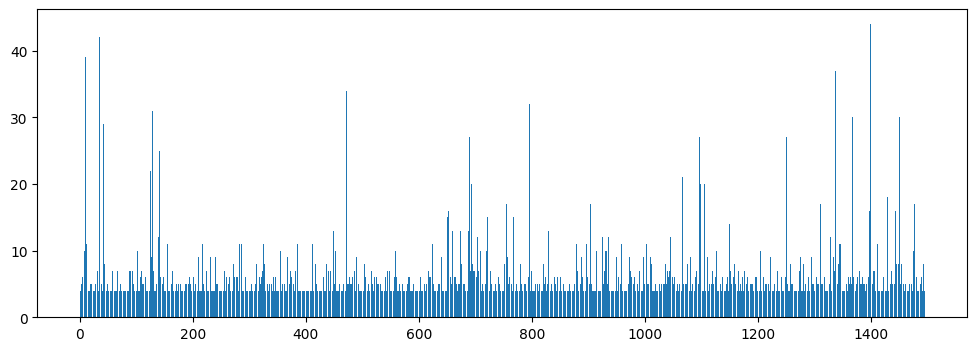

In [6]:
groups, counts = [], []
for k, v in groupped.items():
    groups.append(k)
    counts.append(len(v))
plt.figure(figsize=(12, 4))
plt.bar(groups, counts)

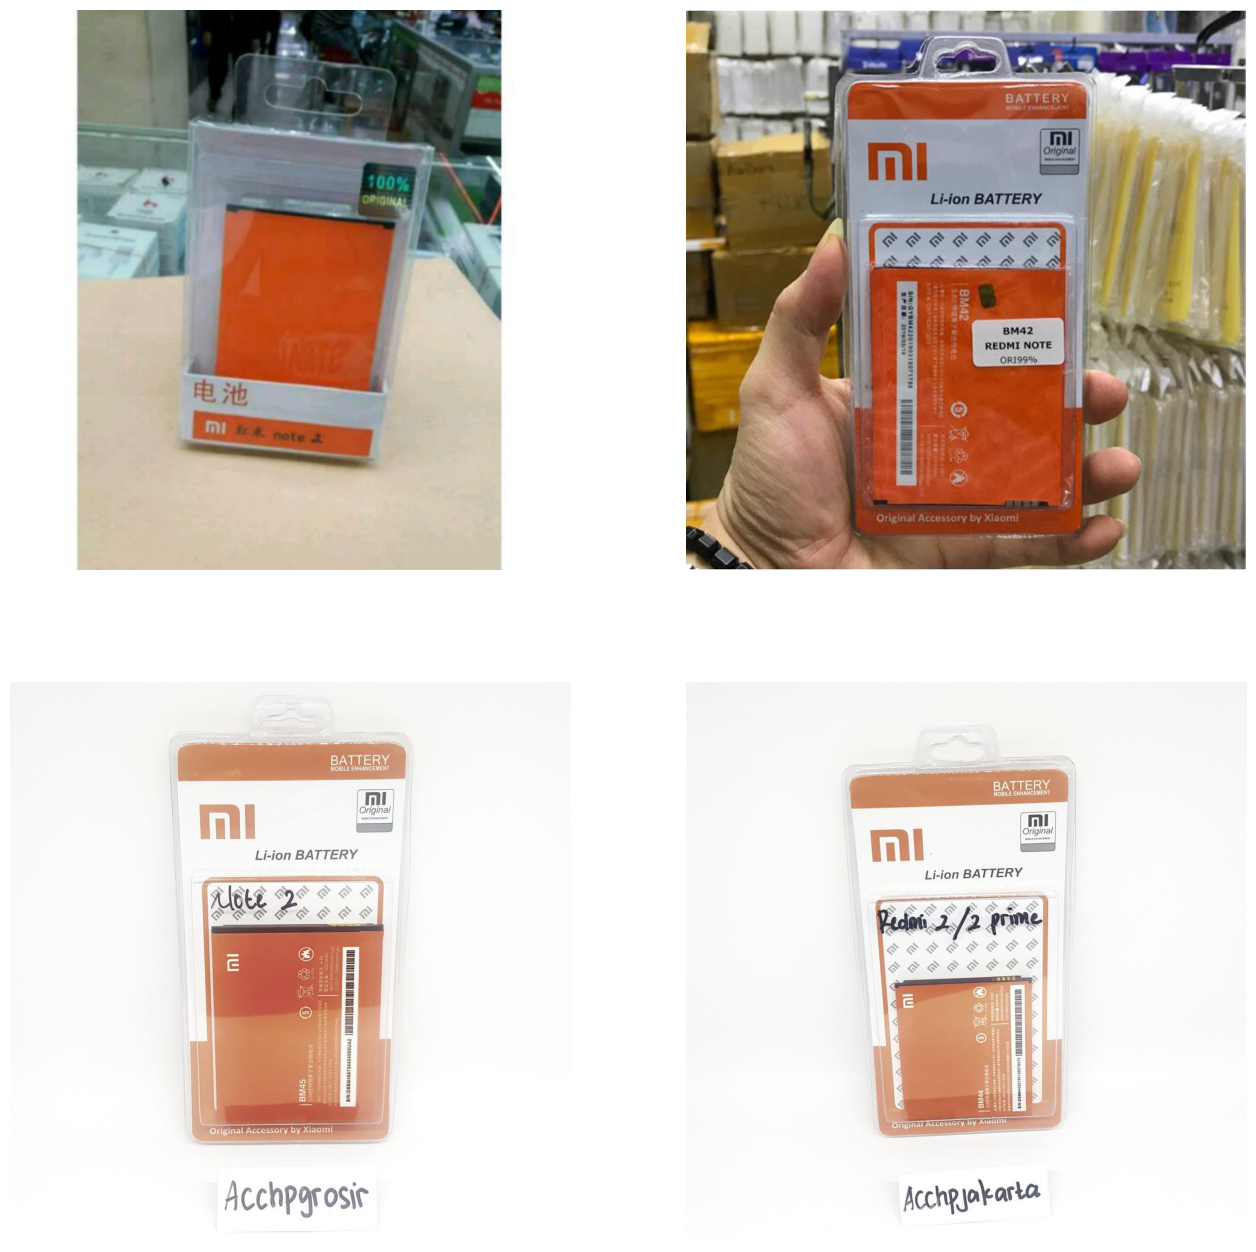

In [7]:
i = 1000

paths_i = groupped[i]
random.shuffle(paths_i)


nrows = 2
ncols = 2

fig = plt.figure(figsize=(16, 16))

for r in range(nrows):
    for c in range(ncols):
        i = r + c*ncols
        path = paths_i[i]
        
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(nrows, ncols, i+1)
        plt.imshow(img)
        plt.axis('off')

## Stanford Online Products

In [8]:
df = pd.read_csv('../Stanford_Online_Products/Ebay_info.txt', sep=' ')
df_g = df_g = df.groupby('super_class_id', group_keys=True).apply(lambda x: x)

groupped = {}

counter = 0
for group in tqdm.tqdm(set(df_g['class_id'])):
    names = list(df_g.path[df_g['class_id'] == group])
    paths = [os.path.join('../Stanford_Online_Products', name) for name in names]
    
    if len(paths) >= 4:
        groupped[counter] = paths
        counter += 1

counter, sum(len(v) for _, v in groupped.items())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 22634/22634 [00:03<00:00, 6196.63it/s]


(14603, 100238)

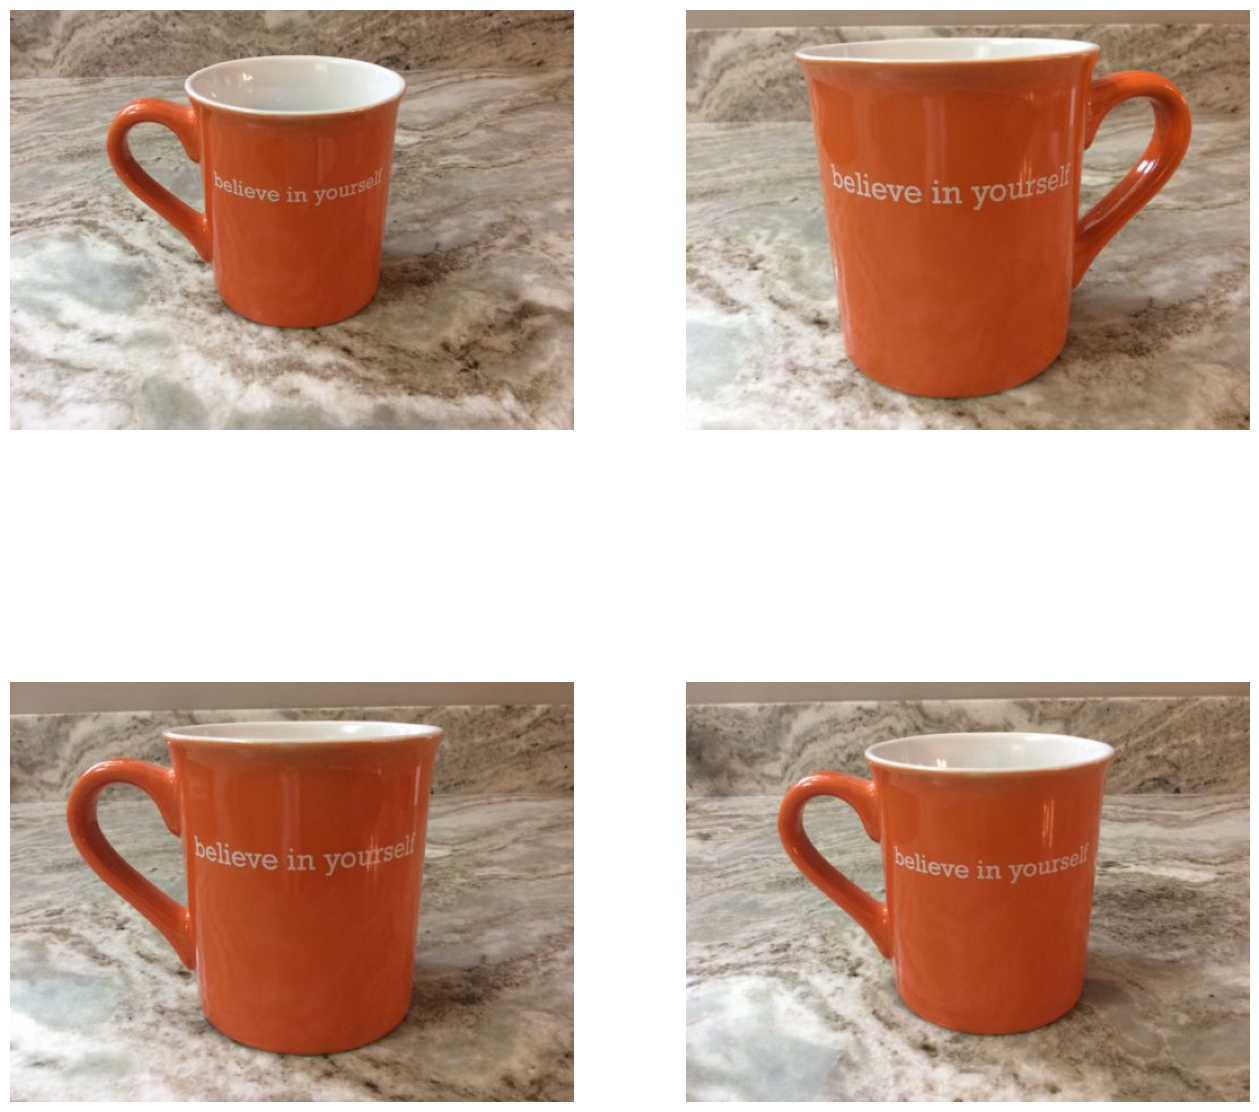

In [9]:
i = 10000

paths_i = groupped[i]
random.shuffle(paths_i)


nrows = 2
ncols = 2

fig = plt.figure(figsize=(16, 16))

for r in range(nrows):
    for c in range(ncols):
        i = r + c*ncols
        path = paths_i[i]
        
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(nrows, ncols, i+1)
        plt.imshow(img)
        plt.axis('off')

## Products 10k

In [10]:
df = pd.read_csv('../products-10k/train.csv')
df_g = df_g = df.groupby('group', group_keys=True).apply(lambda x: x)

groupped = {}

counter = 0
for group in tqdm.tqdm(set(df_g['class'])):
    names = list(df_g.name[df_g['class'] == group])
    paths = [os.path.join('../products-10k/train', name) for name in names]
    if len(paths) >= 4:
        groupped[counter] = paths
        counter += 1

counter, sum(len(v) for _, v in groupped.items())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 9691/9691 [00:01<00:00, 5701.14it/s]


(9004, 140058)

<BarContainer object of 9004 artists>

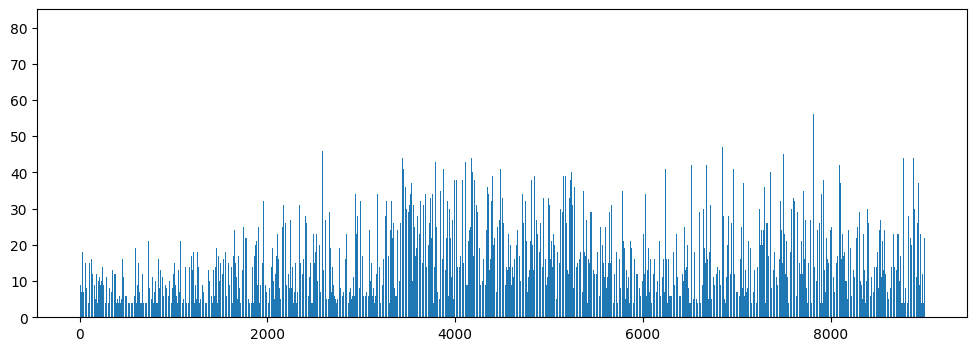

In [11]:
groups, counts = [], []
for k, v in groupped.items():
    groups.append(k)
    counts.append(len(v))
plt.figure(figsize=(12, 4))
plt.bar(groups, counts)

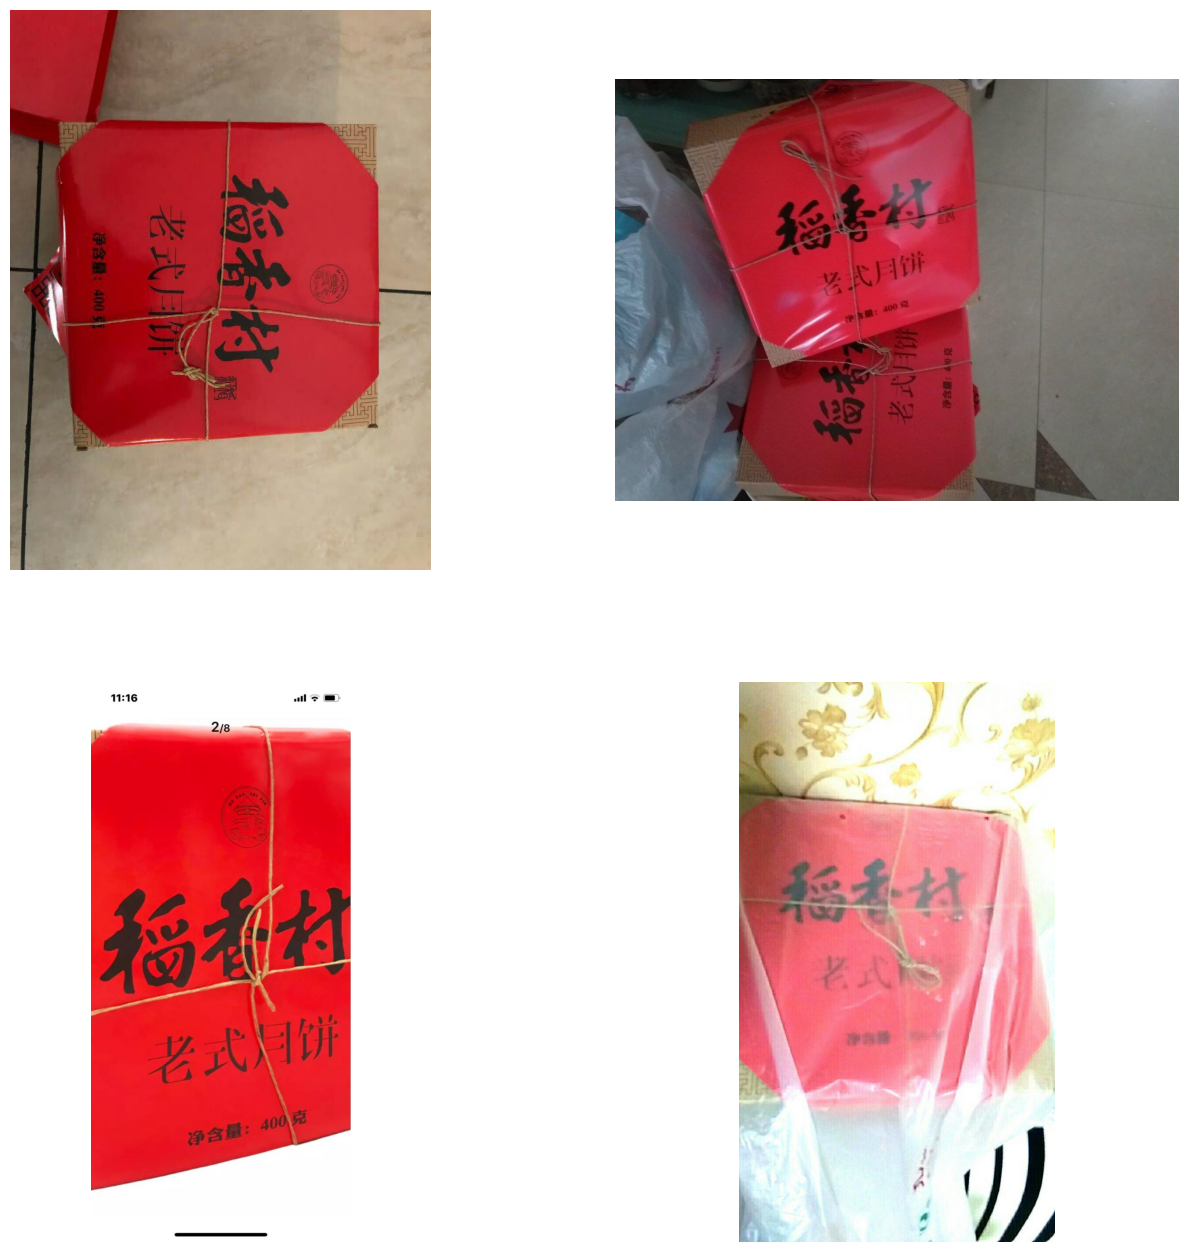

In [12]:
i = 5000

paths_i = groupped[i]
random.shuffle(paths_i)


nrows = 2
ncols = 2

fig = plt.figure(figsize=(16, 16))

for r in range(nrows):
    for c in range(ncols):
        i = r + c*ncols
        path = paths_i[i]
        
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(nrows, ncols, i+1)
        plt.imshow(img)
        plt.axis('off')
    